In [136]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import math

In [3]:
oddsratio, p_value = stats.fisher_exact([[10,5],[7,15]])

In [4]:
p_value

0.049751235977477978

In [5]:
stats.binom(10,0.5)

In [13]:
np.random.binomial(1,0.5,10)

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 0])

In [14]:
('A','B') * 5

('A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B')

In [9]:
n = 10
d = {'input':('A','B') * (n//2),'event':np.random.binomial(1,0.5,n)}
inp = pd.DataFrame(data=d)

In [42]:
a = inp[inp['input'] == 'A']
b = inp[inp['input'] == 'B']

,,event,input
input,input,,


In [10]:
inp

,event,input
0,0,A
1,1,B
2,0,A
3,0,B
4,0,A
5,1,B
6,0,A
7,0,B
8,0,A
9,1,B


In [11]:
conti_tab = inp.groupby('input').agg({'event': ['sum', 'count']})

In [12]:
conti_tab['event']['count'] = conti_tab['event']['count'] - conti_tab['event']['sum'] 

In [13]:
conti_tab['event']

,sum,count
input,,
A,0,5
B,3,2


In [14]:
stats.fisher_exact(conti_tab['event'])

(0.0, 0.16666666666666666)

In [67]:
stats.fisher_exact([[2,3],[4,1]])

(0.16666666666666666, 0.52380952380952395)

In [74]:
n = 100000
d = {'input':('A','B') * (n//2),'event':np.random.binomial(1,0.5,n)}
inp = pd.DataFrame(data=d)

In [75]:
conti_tab = inp.groupby('input').agg({'event': ['sum', 'count']})
conti_tab['event']['count'] = conti_tab['event']['count'] - conti_tab['event']['sum'] 
conti_tab

event       
         sum  count
input              
A      25122  24878
B      24980  25020

In [76]:
stats.fisher_exact(conti_tab['event'])

(1.011424848537082, 0.37251943958384759)

In [92]:
stats.chi2_contingency(conti_tab['event'])

(0.53536993014194811,
 0.46435793738886244,
 1,
 array([[ 20.29292929,  28.70707071],
        [ 20.70707071,  29.29292929]]))

## Try with more than 2 categories?

In [86]:
n = 18
d = {'input':('A','B','C') * (n//3),'event':np.random.binomial(1,0.5,n)}
inp = pd.DataFrame(data=d)

In [87]:
conti_tab = inp.groupby('input').agg({'event': ['sum', 'count']})
conti_tab['event']['count'] = conti_tab['event']['count'] - conti_tab['event']['sum'] 
conti_tab

event      
        sum count
input            
A         2     4
B         1     5
C         3     3

In [89]:
stats.chi2_contingency(conti_tab['event'])

(1.5, 0.47236655274101491, 2, array([[ 2.,  4.],
        [ 2.,  4.],
        [ 2.,  4.]]))

In [52]:
n = 100
p = 0.5
x = 1
name = np.repeat(('A','B'),n/2)
value= np.random.binomial(x, p,size = n)
d = {'input':name,'event':value}
inp = pd.DataFrame(data=d)

conti_tab = inp.groupby('input').agg({'event': ['sum', 'count']})
conti_tab['event']['count'] = conti_tab['event']['count'] - conti_tab['event']['sum'] 
conti_tab

event      
        sum count
input            
A        19    31
B        23    27

In [53]:
stats.fisher_exact(conti_tab['event'])

(0.71949509116409538, 0.54356169743102922)

In [54]:
d = {'index':[],'p_val':[]}

In [65]:
inp = inp.sample(frac=1).reset_index(drop=True)

In [69]:
ip = {'index':[],'p_val':[]}
for i in range(20,len(inp)):
    conti_tab = inp[0:i].groupby('input').agg({'event': ['sum', 'count']})
    conti_tab['event']['count'] = conti_tab['event']['count'] - conti_tab['event']['sum'] 
    ip['index'].append(i)
#     print(conti_tab['event'])
    pval = stats.fisher_exact(conti_tab['event'])[1]
    ip['p_val'].append(round(pval,4))

In [71]:
import matplotlib.pyplot as plt
% matplotlib inline

Text(50,0.07,'Alpha value 0.05')

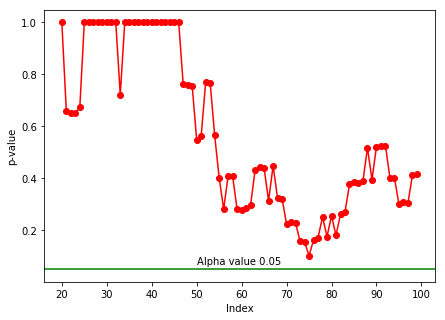

In [96]:
f, ax = plt.subplots(figsize=(7,5))
# f.figure(figsize=(7,5))
# ax.title("RBF kernel" + " with constant C")
ax.plot(ip['index'],ip['p_val'], "-or")
ax.axhline(y=0.05, color='g', linestyle='-')
ax.set_xlabel("Index")
ax.set_ylabel("p-value")
ax.annotate('Alpha value' + ' 0.05',xy=(len(data)//2,alpha + 0.02))
# plt.legend()

In [43]:
pd.DataFrame(data=d)

,index,p_val
0,97,0.544613
1,98,0.686278
2,99,0.689322


# Write function

In [130]:
n = 2500
p = 0.5
x = 1
name = np.repeat(('A','B'),n/2)
value= np.random.binomial(x, p,size = n)
d = {'input':name,'event':value}
inp = pd.DataFrame(data=d)

In [158]:
def AB_freq(data,alpha = 0.05):
    conti_tab = data.groupby('input').agg({'event': ['sum', 'count']})
    conti_tab['event']['count'] = conti_tab['event']['count'] - conti_tab['event']['sum'] 
    
    ip = {'index':[],'p_val':[]}
    if len(data) < 2000: 
        method = "Fisher"
        start_iter = floor(0.75 * len(inp))
        for i in range(start_iter,len(inp)):
            conti_tab = inp[0:i].groupby('input').agg({'event': ['sum', 'count']})
            conti_tab['event']['count'] = conti_tab['event']['count'] - conti_tab['event']['sum'] 
            ip['index'].append(i)
            pval = stats.fisher_exact(conti_tab['event'])[1]
            ip['p_val'].append(round(pval,4))
    else:
        method = "Chi square test"
        start_iter = math.floor(0.75 * len(inp))
        for i in range(start_iter,len(inp)):
            conti_tab = inp[0:i].groupby('input').agg({'event': ['sum', 'count']})
            conti_tab['event']['count'] = conti_tab['event']['count'] - conti_tab['event']['sum'] 
            ip['index'].append(i)
            pval = stats.chi2_contingency(conti_tab['event'])[1]
            ip['p_val'].append(round(pval,4))
    
    f, ax = plt.subplots(figsize=(7,5))
    ax.plot(ip['index'],ip['p_val'], "-or")
    ax.axhline(y=alpha, color='g', linestyle='-')
    ax.set_xlabel("Record number")
    ax.set_ylabel("p-value")
    ax.set_title("Variation of p-values",fontsize = 15)
    ax.annotate('Alpha value = ' + str(alpha),xy=(len(data) - len(data)//4,alpha + 0.02),fontsize = 12)
    
    return [ip['p_val'][-1],ax,method]

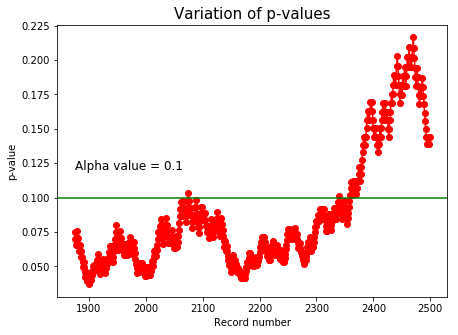

In [159]:
op = AB_freq(inp,0.1)

In [161]:
op[2]

'Chi square test'